# Data science with python, pandas and matplotlib

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt

## merge the 12 months

In [2]:
files = [x for x in os.listdir('./Sales_Data')]

all_months = pd.DataFrame()

for x in files:
    df1 = pd.read_csv('./Sales_Data/'+ x)
    all_months = pd.concat([all_months, df1])
    
all_months.to_csv('df.csv', index = False)

In [3]:
df = pd.read_csv('df.csv')
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


## clean the data

In [4]:
df = df.dropna()
df = df[df['Quantity Ordered'] != 'Quantity Ordered']

df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


## string to float

In [5]:
df[['Quantity Ordered', 'Price Each']] = df[['Quantity Ordered', 'Price Each']].apply(pd.to_numeric)

## create some more columns

In [6]:
df['Total Price'] = df['Quantity Ordered'] * df['Price Each']

In [7]:
df['Month'] = df['Order Date'].str[0:2]

In [8]:
df['Day'] = df['Order Date'].str[3:5]

In [9]:
df['Hour'] = df['Order Date'].str[-5:-3]

In [10]:
df['Date'] = df['Order Date'].str[0:5]

In [11]:
df['City'] = df['Purchase Address'].str.split(', ').str[1]

In [12]:
df['City'] = df['City'] + df['Purchase Address'].str[-10:-6]

In [13]:
df['State'] = df['Purchase Address'].str[-9:-6]

In [14]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Total Price,Month,Day,Hour,Date,City,State
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",23.90,04,19,08,04/19,"Dallas, TX",TX
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",99.99,04,07,22,04/07,"Boston, MA",MA
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",600.00,04,12,14,04/12,"Los Angeles, CA",CA
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",11.99,04,12,14,04/12,"Los Angeles, CA",CA
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",11.99,04,30,09,04/30,"Los Angeles, CA",CA


# some charts and data

### day with more earnings

In [15]:
max_earnings = df.groupby(['Date']).sum().sort_values('Total Price', ascending=False)
max_earnings.head()

,Quantity Ordered,Price Each,Total Price
Date,,,
12/04,879,165977.89,166727.69
12/16,914,162437.41,162970.61
12/10,897,162234.28,162832.74
12/20,912,159641.83,160181.30
12/17,1044,156335.63,157364.72


### Month with more earnings

In [16]:
max_earnings_month = df.groupby(['Month']).sum()
max_earnings_month.head()

,Quantity Ordered,Price Each,Total Price
Month,,,
01,10903,1.811768e+06,1.822257e+06
02,13449,2.188885e+06,2.202022e+06
03,17005,2.791208e+06,2.807100e+06
04,20558,3.367671e+06,3.390670e+06
05,18667,3.135125e+06,3.152607e+06


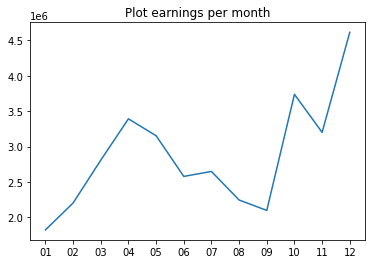

In [17]:
x = max_earnings_month['Total Price']
plt.title('Plot earnings per month')

plt.plot(x)
plt.show()

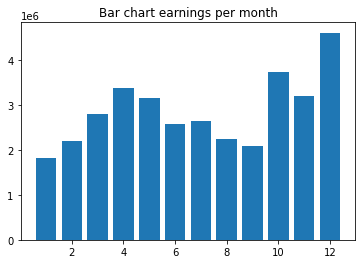

In [18]:
y = max_earnings_month['Total Price']
x = range(1, 13)
plt.title('Bar chart earnings per month')
plt.bar(x, y)
plt.show()

### which hour there are more sales?

In [19]:
sales_hour = df.groupby(['Hour']).sum()
sales_hour.head()

,Quantity Ordered,Price Each,Total Price
Hour,,,
00,4428,709296.70,713721.27
01,2619,458490.00,460866.88
02,1398,233833.64,234851.44
03,928,144726.42,145757.89
04,937,162058.18,162661.01


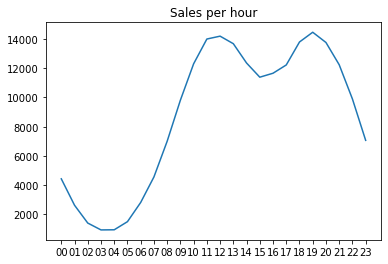

In [20]:
x = sales_hour['Quantity Ordered']
plt.title('Sales per hour')

plt.plot(x)
plt.show()

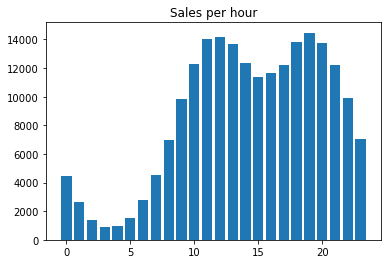

In [21]:
y = sales_hour['Quantity Ordered']
plt.title('Sales per hour')
x = range(0, 24)
plt.bar(x, y)
plt.show()

### average orders per day and month

In [22]:
group_data = df.groupby(['Date']).sum()

average_orders = group_data['Quantity Ordered'].mean()
round(average_orders, 2)

572.82

In [46]:
group_data_month = df.groupby(['Month']).mean()
group_data_month.head()

,Quantity Ordered,Price Each,Total Price
Month,,,
01,1.122979,186.607105,187.687376
02,1.123090,182.787868,183.884962
03,1.122220,184.201665,185.250471
04,1.124679,184.237158,185.495390
05,1.126826,189.250581,190.305852


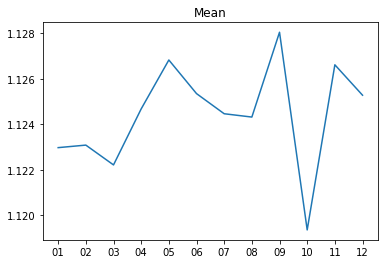

In [24]:
y = group_data_month['Quantity Ordered']
plt.title('Mean')
plt.plot( y)
plt.show()

### city with the most sales

In [55]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Total Price,Month,Day,Hour,Date,City,State
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",23.90,04,19,08,04/19,"Dallas, TX",TX
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",99.99,04,07,22,04/07,"Boston, MA",MA
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",600.00,04,12,14,04/12,"Los Angeles, CA",CA
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",11.99,04,12,14,04/12,"Los Angeles, CA",CA
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",11.99,04,30,09,04/30,"Los Angeles, CA",CA


In [32]:
city_sales = df.groupby(['City']).sum()
#.sort_values('Quantity Ordered', ascending=False)
city_sales.head()

,Quantity Ordered,Price Each,Total Price
City,,,
"Atlanta, GA",16602,2.779908e+06,2.795499e+06
"Austin, TX",11153,1.809874e+06,1.819582e+06
"Boston, MA",22528,3.637410e+06,3.661642e+06
"Dallas, TX",16730,2.752628e+06,2.767975e+06
"Los Angeles, CA",33289,5.421435e+06,5.452571e+06


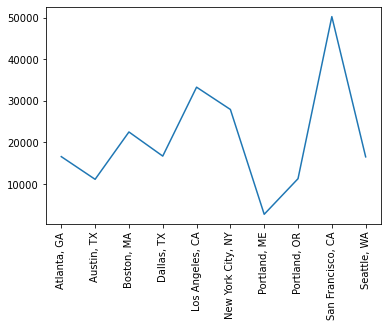

In [37]:
x = city_sales['Quantity Ordered']
plt.xticks(rotation=90)
plt.plot(x)
plt.show()

### state with the most sales

In [53]:
state_sales = df.groupby(['State']).sum()
#.sort_values('Quantity Ordered', ascending=False)
state_sales.head()

,Quantity Ordered,Price Each,Total Price
State,,,
CA,83528,1.363290e+07,1.371477e+07
GA,16602,2.779908e+06,2.795499e+06
MA,22528,3.637410e+06,3.661642e+06
ME,2750,4.471893e+05,4.497583e+05
NY,27932,4.635371e+06,4.664317e+06


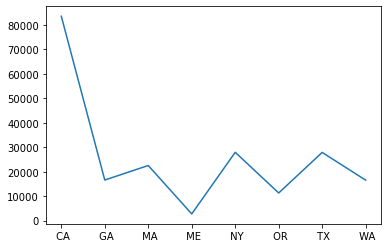

In [51]:
x = state_sales['Quantity Ordered']
plt.plot(x)
plt.show()

### state with the most sales excluding sant francisco

In [57]:
no_sf = df[df['City'] != 'San Francisco, CA']

In [58]:
state_sales_no_sf = no_sf.groupby(['State']).sum()
#.sort_values('Quantity Ordered', ascending=False)
state_sales_no_sf.head()

,Quantity Ordered,Price Each,Total Price
State,,,
CA,33289,5.421435e+06,5.452571e+06
GA,16602,2.779908e+06,2.795499e+06
MA,22528,3.637410e+06,3.661642e+06
ME,2750,4.471893e+05,4.497583e+05
NY,27932,4.635371e+06,4.664317e+06


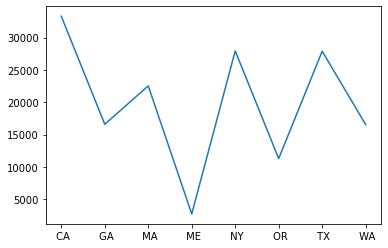

In [59]:
x = state_sales_no_sf['Quantity Ordered']
plt.plot(x)
plt.show()

### city with which they erned more money

### state with which they erned more money

## conclusions

The day with more earnings is 12/4 (MM/DD) possibly due to christmas gifts and the month with more earnings is december possibly because christmas.

The hour where most people order is at 12 and 19. This could be because 12 is when you take a breack from work and is before lunch, and 19 is like after work when you come back home. These are the best hours to display advertising.

California is the most important satate for this company, whith sales on L.A. and Sant Francisco. Sant Francisco being the city with most sales with huge difference.